# Lecture 12: Dynamic Programming

In lecture we'll also talk about the Floyd-Warshall and Bellman-Ford algorithms.  In this notebook we'll introduce the benefits of dynamic programming by considering the simple problem of computing Fibonacci numbers.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import time
%matplotlib inline

Here is one way to compute the Fibonacci numbers:

In [2]:
def Fibonacci(n):
    if n == 0 or n == 1:
        return 1
    return Fibonacci(n-1) + Fibonacci(n-2)

In [3]:
for n in range(10):
    print(Fibonacci(n))

1
1
2
3
5
8
13
21
34
55


In [4]:
def computeSomeVals(myFn, Ns = range(10,100,10), numTrials=3):
    nValues = []
    tValues = []
    for n in Ns:
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for t in range(numTrials):
            start = time.time()
            myFn(n)
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues

In [5]:
nVals = range(1,30)
nVals, tVals = computeSomeVals(Fibonacci, nVals)

Text(0.5, 1.0, 'Computing Fibonacci Numbers')

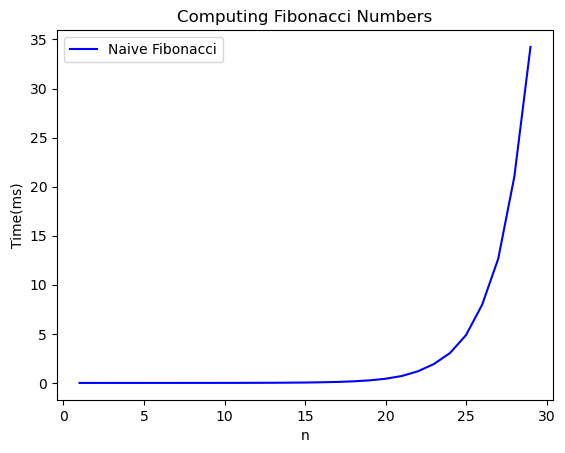

In [6]:
plt.plot(nVals, tVals, color="blue", label="Naive Fibonacci")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Computing Fibonacci Numbers")

In [7]:
def fasterFibonacci(n):
    F = [1 for i in range(n+1)]
    for i in range(2,n+1):
        F[i] = F[i-1] + F[i-2]
    return F[n]

In [8]:
for n in range(10):
    print(Fibonacci(n))

1
1
2
3
5
8
13
21
34
55


In [9]:
nValsFast = range(1,2000,10)
nValsFast, tValsFast = computeSomeVals(fasterFibonacci, nValsFast,numTrials=50)

Text(0.5, 1.0, 'Computing Fibonacci Numbers')

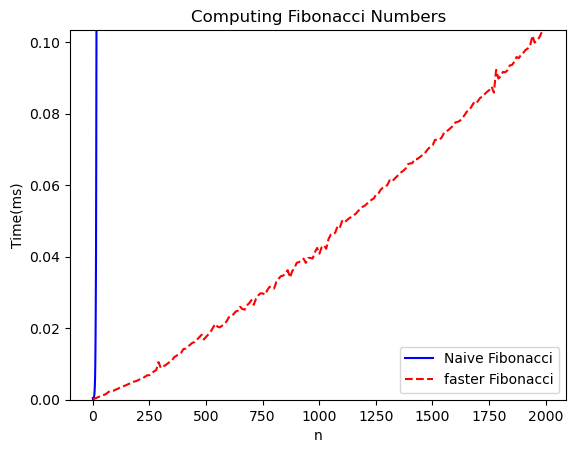

In [10]:
plt.plot(nVals, tVals, color="blue", label="Naive Fibonacci")
plt.plot(nValsFast, tValsFast, "--", color="red", label="faster Fibonacci")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.ylim([0,tValsFast[-1]])
plt.title("Computing Fibonacci Numbers")

In [11]:
def Fibonacci_topdown(n,F):
    if F[n] != None:
        return F[n]
    F[n] = Fibonacci_topdown(n-1,F) + Fibonacci_topdown(n-2,F)
    return F[n]

In [12]:
for n in range(10):
    print(Fibonacci_topdown(n, [1,1] + [None for i in range(n-1)]))

1
1
2
3
5
8
13
21
34
55


In [13]:
nValsTD = range(1,2000,10)
nValsTD, tValsTD = computeSomeVals(fasterFibonacci, nValsTD,numTrials=50)

Text(0.5, 1.0, 'Computing Fibonacci Numbers')

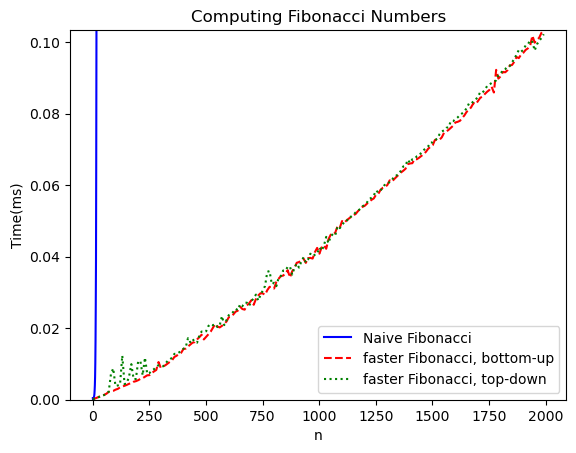

In [14]:
plt.plot(nVals, tVals, color="blue", label="Naive Fibonacci")
plt.plot(nValsFast, tValsFast, "--", color="red", label="faster Fibonacci, bottom-up")
plt.plot(nValsTD, tValsTD, ":", color="green", label="faster Fibonacci, top-down")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.ylim([0,tValsFast[-1]])
plt.title("Computing Fibonacci Numbers")

# Here's a puzzle:

Our code looks like it has runtime O(n).  But if we go out far enough it looks like it's curving up.  What's going on? 

In [15]:
nValsFast = list(range(1,100,10)) + list(range(100,1000,100)) + list(range(1000,10000,500)) + list(range(10000,50000,5000))
nValsFast, tValsFast = computeSomeVals(fasterFibonacci, nValsFast,numTrials=20)

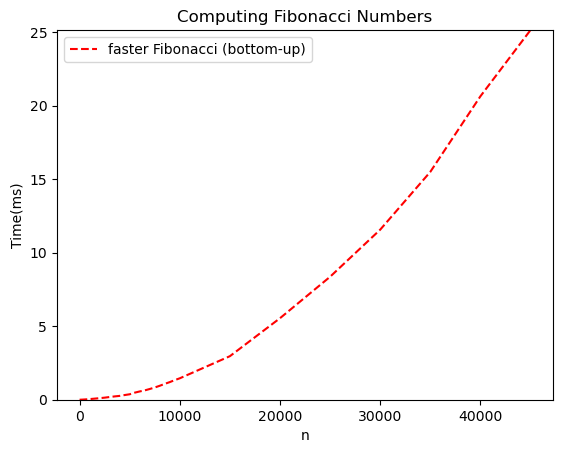

In [16]:
plt.plot(nValsFast, tValsFast, "--", color="red", label="faster Fibonacci (bottom-up)")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.ylim([0,tValsFast[-1]])
plt.title("Computing Fibonacci Numbers")
plt.show()

Here's an even faster way to do it :)  (Just for fun).

In [17]:
def squareMat(a,b,c,d):
    return ( a**2 + b*c, a*b + b*d , c*a + d*c , c*b + d**2 )
def makePower(t):
    a = 0
    b = 1
    c = 1 
    d = 1
    for i in range(t):
        a,b,c,d = squareMat(a,b,c,d)
    return a + b

In [18]:
for t in range(8):
    print(t, fasterFibonacci(2**t), makePower(t))

0 1 1
1 2 2
2 5 5
3 34 34
4 1597 1597
5 3524578 3524578
6 17167680177565 17167680177565
7 407305795904080553832073954 407305795904080553832073954


In [19]:
fakeNVals = [x for x in range(17)]
nValsFaster, tValsFaster = computeSomeVals(makePower, fakeNVals,numTrials=50)
nValsFaster = [2**x for x in range(17)]

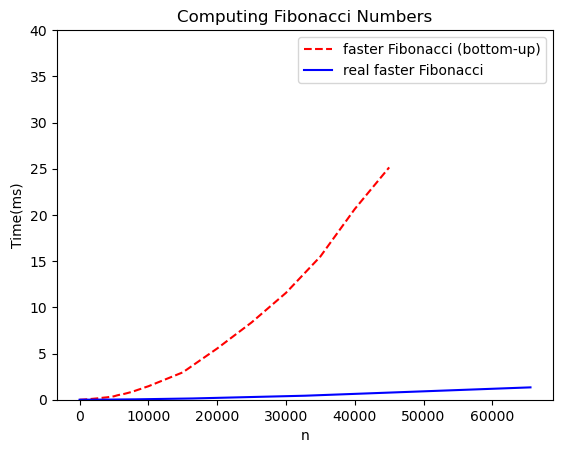

In [20]:
plt.plot(nValsFast, tValsFast, "--", color="red", label="faster Fibonacci (bottom-up)")
plt.plot(nValsFaster, tValsFaster, "-", color="blue", label="real faster Fibonacci")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.ylim([0,40])
plt.title("Computing Fibonacci Numbers")
plt.show()